In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import h5py
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [ ]:
f_DMSO = h5py.File('merge/DMSO.4run.rpmdpm.h5', 'r')

In [ ]:
list(f_DMSO.keys())

In [ ]:
df_DMSO_DPM = pd.read_hdf('merge/DMSO.4run.rpmdpm.h5','DPM')

In [ ]:
df_DMSO_RNA = pd.read_hdf('merge/DMSO.4run.rpmdpm.h5','RPM')

df_DMSO_RNA

In [ ]:
df_DMSO_RNA.loc[df_DMSO_RNA['Repeat'] == 'U1.snRNA']

In [ ]:
df_FVP_dpm = pd.read_hdf('merge/FVP.4run.rpmdpm.h5','DPM')
df_FVP_rpm = pd.read_hdf('merge/FVP.4run.rpmdpm.h5','RPM')


In [ ]:
df_FVP_rpm.loc[df_FVP_rpm['Repeat'] == 'U1.snRNA']

In [ ]:
DMSO_counts = df_DMSO_RNA['Repeat'].value_counts()

In [ ]:
DMSO_counts.loc[['U1.snRNA', '18S.rRNA']]

In [ ]:
df_FVP_rpm.info()

In [3]:
f_DMSO = h5py.File('merge/DMSO.4run.2to200.rpm.h5', 'r')

In [4]:
list(f_DMSO.keys())

['Names', 'RPM', 'RepeatRPM']

In [ ]:
df_DMSO_RPM_small = pd.read_hdf('merge/DMSO.4run.2to200.rpm.h5','RPM')

In [ ]:
df_DMSO_RPM_small['Name'].value_counts().info()

In [6]:
f_rna_DMSO = h5py.File('merge/DMSO.4run.1to2k.rpm.h5', 'r')
f_rna_DMSO.keys()

<KeysViewHDF5 ['Names', 'RPM', 'RepeatRPM']>

In [ ]:
df_DMSO_RNA = pd.read_hdf('merge/DMSO.4run.1to2k.rpm.h5','RPM')

In [ ]:
df_DMSO_RNA['Name'].tail()

In [ ]:
df_DMSO_RNA['Name'].max

In [3]:
df_FVP_RNA = pd.read_hdf('merge/FVP.4run.1to2k.rpm.h5','RPM')

df_FVP_RNA

,Chromosome,Start,End,Name,Strand,Size,DPMSize,Exon,Intron,Repeat,Antisense
2926,chr5,146261114,146261205,0,+,7,6,NaN,Cdk8.protein_coding,28S.rRNA,NaN
5043,chr11,62603073,62603150,1,+,81,59,NaN,2410006H16Rik.processed_transcript,Snord49b.snoRNA,NaN
5036,chr16,57391560,57391676,1,-,81,59,NaN,Cmss1.protein_coding,28S.rRNA,Filip1l
5033,chr17,39846453,39846509,1,+,81,59,NaN,NaN,18S.rRNA,NaN
5034,chr17,39846211,39846324,1,+,81,59,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
94969176,chrY,90826707,90828448,120899866,-,1,0,NaN,NaN,NaN,NaN
94969177,chrY,90826718,90826796,120899867,+,2,0,NaN,NaN,NaN,NaN
94969178,chrY,90827121,90827203,120899868,-,1,0,NaN,NaN,NaN,NaN
94969179,chrY,90835366,90835485,120899869,+,1,0,NaN,NaN,NaN,NaN


In [4]:
FVP_repeat_counts = df_FVP_RNA['Repeat'].value_counts()
FVP_repeat_counts.loc[['U1.snRNA', '18S.rRNA']]

U1.snRNA      297903
18S.rRNA    37912975
Name: Repeat, dtype: int64

In [5]:
DMSO_repeat_counts = df_DMSO_RNA['Repeat'].value_counts()
DMSO_exon_counts = df_DMSO_RNA['Exon'].value_counts()
DMSO_intron_counts = df_DMSO_RNA['Intron'].value_counts()

In [6]:
DMSO_repeat_counts.loc[['U1.snRNA', '18S.rRNA']]

U1.snRNA      237541
18S.rRNA    37608997
Name: Repeat, dtype: int64

In [13]:
DMSO_FVP_cat = pd.concat([DMSO_repeat_counts,FVP_repeat_counts], axis = 1)
DMSO_FVP_cat.columns=["DMSO","FVP"]
DMSO_FVP_cat['Ratio FVP/DMSO'] = DMSO_FVP_cat['FVP']/DMSO_FVP_cat['DMSO']
DMSO_FVP_cat

,DMSO,FVP,Ratio FVP/DMSO
18S.rRNA,37608997.0,37912975.0,1.008083
28S.rRNA,32926361.0,36494419.0,1.108365
5S.rRNA,478172.0,554799.0,1.160250
AMB,437950.0,490850.0,1.120790
U5.snRNA,355141.0,412038.0,1.160210
U4.snRNA,342818.0,377390.0,1.100847
L1MdGf_II.LINE_L1,329960.0,299882.0,0.908843
U2.snRNA,271497.0,250808.0,0.923797
B2.SINE_B2,243273.0,450848.0,1.853260
U1.snRNA,237541.0,297903.0,1.254112


In [14]:
DMSO_FVP_cat.to_csv('Repeat_ratios.csv')

In [15]:
DMSO_intron_counts

Cmss1.protein_coding       8763750
Cdk8.protein_coding        1658894
Gphn.protein_coding        1098406
Kpna1.protein_coding        589679
Il31ra.protein_coding       354397
                            ...   
Olfr1048.protein_coding          1
Olfr1261.protein_coding          1
Olfr1270.protein_coding          1
Rag2.protein_coding              1
4930528P14Rik.lincRNA            1
Name: Intron, Length: 24531, dtype: int64

<Axes: >

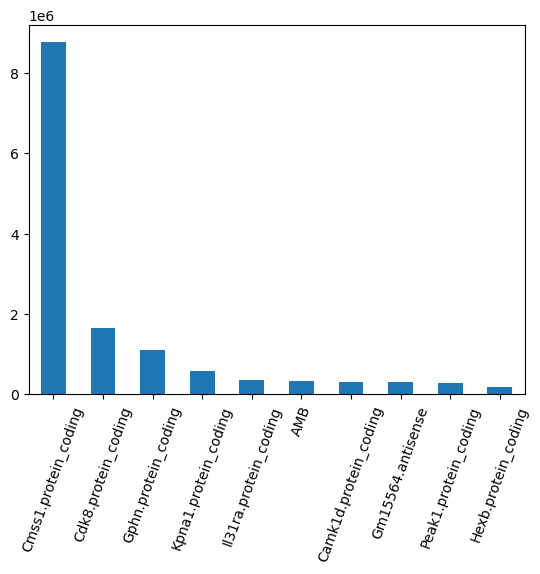

In [36]:
DMSO_introns = DMSO_intron_counts[0:10]
DMSO_introns.plot.bar(rot = 70)

In [12]:
df_DMSO_RNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95002952 entries, 1 to 99741257
Data columns (total 11 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Chromosome  object
 1   Start       int32 
 2   End         int32 
 3   Name        int64 
 4   Strand      object
 5   Size        int32 
 6   DPMSize     int32 
 7   Exon        object
 8   Intron      object
 9   Repeat      object
 10  Antisense   object
dtypes: int32(4), int64(1), object(6)
memory usage: 7.1+ GB


In [26]:
DMSO_intron_counts[0:99]

Cmss1.protein_coding      8763750
Cdk8.protein_coding       1658894
Gphn.protein_coding       1098406
Kpna1.protein_coding       589679
Il31ra.protein_coding      354397
                           ...   
Mdm4.protein_coding          9809
Slc10a7.protein_coding       9788
Epha4.protein_coding         9669
Lamp2.protein_coding         9586
Snd1.protein_coding          9527
Name: Intron, Length: 99, dtype: int64

In [11]:
df_DMSO_repeats = pd.read_hdf('merge/DMSO.4run.1to2k.rpm.h5','RepeatRPM')

In [16]:
df_DMSO_repeats.head(10)

,Name,Repeat,Size,DPMSize
0,0,28S.rRNA,19,15
1,0,B2.SINE_B2,19,15
2,1,28S.rRNA,12,5
3,1,28S.rRNA,12,5
4,2,28S.rRNA,11,10
887,3,5S.rRNA,29,20
888,6,28S.rRNA,3,2
891,8,18S.rRNA,452,397
894,8,18S.rRNA,452,397
901,8,18S.rRNA,452,397


In [13]:
DMSO_repeat_counts = df_DMSO_repeats['Repeat'].value_counts()

In [14]:
DMSO_repeat_counts

28S.rRNA                            70161425
18S.rRNA                            18398882
5.8S.rRNA                            2786132
5S.rRNA                              1417487
U1.snRNA                              919729
U2.snRNA                              706949
4.5S.scRNA                            315369
ITS2.rRNA                             305570
tRNA-Lys-AAG.tRNA                     267373
tRNA-Pro-CCY.tRNA                     176454
B2.SINE_B2                            154367
U6.snRNA                              150842
ITS1.rRNA                             124237
7SLRNA.srpRNA                         112431
tRNA-Glu-GAG_v.tRNA                   111757
U12.snRNA                              93653
7SK.snRNA                              89851
tRNA-Asp-GAY.tRNA                      85101
B1.SINE_Alu                            79576
tRNA-Pro-CCA.tRNA                      73175
tRNA-Gly-GGA.tRNA                      66928
U3.snoRNA                              66928
tRNA-Asn-A

In [15]:
df_test_csv = pd.read_csv('Repeat_ratios.csv')

df_test_csv

,Unnamed: 0,DMSO,FVP,Ratio FVP/DMSO
0,18S.rRNA,37608997.0,37912975.0,1.008083
1,28S.rRNA,32926361.0,36494419.0,1.108365
2,5S.rRNA,478172.0,554799.0,1.160250
3,AMB,437950.0,490850.0,1.120790
4,U5.snRNA,355141.0,412038.0,1.160210
5,U4.snRNA,342818.0,377390.0,1.100847
6,L1MdGf_II.LINE_L1,329960.0,299882.0,0.908843
7,U2.snRNA,271497.0,250808.0,0.923797
8,B2.SINE_B2,243273.0,450848.0,1.853260
9,U1.snRNA,237541.0,297903.0,1.254112
